# **Regressão Linear from Scratch**
#### **Heitor Barroso Cavalcante**

## **Bibliotecas Utilizadas**

Nesse projeto, utilizei a biblioteca Numpy para manipulações e operações entre vetores, Pandas para tratamento dos dados envolvidos e MatplotLib para visualizações.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IC/Precos_de_imoveis/housing.csv')

Os dados importados estão em formato de tabela, com 47 linhas e 3 colunas:

In [ ]:
data.shape

(47, 3)

Observe que há informações sobre o tamanho de cada imóvel, quantidade de quartos e preço.

In [ ]:
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Nessa situação, como o objetivo é realizar a implementação de Regressão Linear simples, desconsiderei as informações acerca da quantidade de quartos em cada imóvel. Dessa forma, iremos modelar a relação entre o tamanho e o preço dos imóveis nesse dataset.

In [ ]:
data = data.drop(" Bedrooms", axis=1)
data.head()

,Size,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


## **Natureza da Relação entre as variáveis independentes** $x_i$ **e** $y_i$**:**

Primeiramente, antes de aplicarmos esse tipo de Regressão para modelarmos a relação que existe entre a área e o preço desses imóveis, é importante termos noção se, nos dados existentes, é possível identificar uma relação linear entre esses dados. Para isso, para cada $\text{exemplo}_i$ presente no conjunto de dados, com $i = 1, \ldots, N = 1, \ldots, 47$, vamos plotar o par de dados $(\text{Área}_i,\text{Preço}_i) = (x_i, y_i)$:

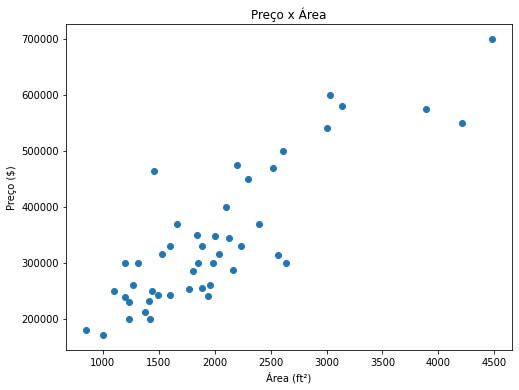

In [ ]:
figure = plt.figure(figsize=(8,6))
_ = plt.scatter(data["Size"], data[" Price"])
_ = plt.xlabel("Área (ft²)")
_ = plt.ylabel("Preço ($)")
_ = plt.title("Preço x Área")

A partir desse gráfico, é evidente a natureza linear da relação entre os dados de entrada e saída da função $f$ que queremos aproximar. Portanto, prosseguiremos com o projeto de implementação de Regressão Linear.

## **Implementação**

Aqui, atribuímos às variáveis ${\tt X}$ e ${\tt Y}$, respectivamente o conjunto das Áreas e Preços presentes no conjunto de dados.

In [ ]:
data = np.array(data)
X = np.array(data[:,0])
Y = np.array(data[:,1])
print(f"formato de X: {X.shape}")
print(f"formato de Y: {Y.shape}")

formato de X: (47,)
formato de Y: (47,)


In [ ]:
print(X)
print(Y)

[2104 1600 2400 1416 3000 1985 1534 1427 1380 1494 1940 2000 1890 4478
 1268 2300 1320 1236 2609 3031 1767 1888 1604 1962 3890 1100 1458 2526
 2200 2637 1839 1000 2040 3137 1811 1437 1239 2132 4215 2162 1664 2238
 2567 1200  852 1852 1203]
[399900 329900 369000 232000 539900 299900 314900 198999 212000 242500
 239999 347000 329999 699900 259900 449900 299900 199900 499998 599000
 252900 255000 242900 259900 573900 249900 464500 469000 475000 299900
 349900 169900 314900 579900 285900 249900 229900 345000 549000 287000
 368500 329900 314000 299000 179900 299900 239500]


### **Normalização dos Dados:**

Nessa etapa do projeto, efetuamos a normalização dos dados com os quais alimentaremos o modelo de Machine Learning.

Nesse sentido, primeiro vamos introduzir esse conceito e explicar o motivo por o utilizarmos.

* **O que é normalização?**

        O tipo de normalização que utilizaremos nessa implementação é chamado 
        "Normalização Z". Para cada dado do conjunto a ser normalizado, 
        efetuamos a seguinte transformação:
        
$$x_i^{(normalizado)} = \dfrac{x_i - \mu}{\sigma} \\
\text{Sendo } \mu \text{ a média do conjunto de dados e } \sigma \text{ seu desvio padrão}$$

* **Por que a utilizamos?**
  
        Ao efeturarmos essa transformação, nós fazemos com que a média dos 
        dados se torne 0 e o desvio padrão 1. 
        
        Em teoria, modelos de regressão (ou redes neurais) não deveriam ser 
        sensíveis à normalizações, tendo e vista que o vetor deveria ser 
        capaz de ser atualizado de modo a anular o efeito dessa transformação 
        linear nos dados de entrada. 
        
        Contudo, ao normalizarmos os dados, conseguimos aumentar a 
        estabilidade numérica envolvida na otimização do modelo. Isso ocorre 
        porque, durante a atualização dos parâmetros, o valor das variáveis 
        independentes influenciam o tamanho dos passos na descida do 
        gradiente; como pode ser observado na expressão.

        Por isso, se tais valores são grandes, é mais provável que a função 
        de perda tenha mais dificuldade para convergir.


$$
w_k(t+1) \leftarrow w_k(t) - \eta \left(\frac{2}{N}\sum^N_{i=1} (y_i - \hat{y}_i)x_{ik}\right)
$$

In [ ]:
def normalize(X):
    X = (X - X.mean(axis=0))/X.std(axis=0)    
    return X

X_normalizado = normalize(X)
Y_normalizado = normalize(Y)


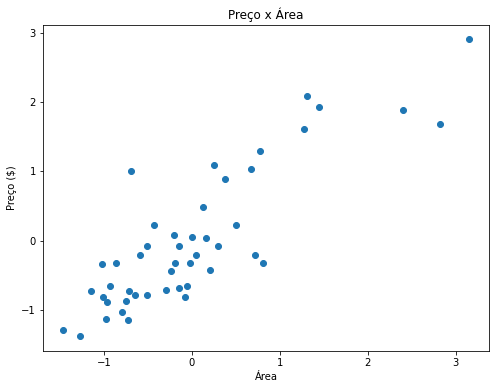

In [ ]:
figure = plt.figure(figsize=(8,6))
_ = plt.scatter(X_normalizado, Y_normalizado)
_ = plt.xlabel("Área")
_ = plt.ylabel("Preço ($)")
_ = plt.title("Preço x Área")

### **Tratamento dos dados:**

Com o método ${\tt ajeita\_dados(X, Y)}$, estamos tratando os dados. Isto é, deixando cada exemplo $(x_i, y_i)$ da maneira definida na seção de regressão Linear no texto Fundamentos de Redes Neurais. 

Dessa forma, transformamos cada valor de $\text{Área}_i$ em um vetor coluna tal que $x_i$ se torna $\textbf{x}_i = \begin{bmatrix}1 \\
x_i \end{bmatrix} = \begin{bmatrix}1 \\
\text{Área}_i \end{bmatrix}$ 

e cada valor de $\text{Preço}_i = y_i$ se torna uma matriz $1 \times 1$. Isso é feito por causa de particularidades da implementação advindas do uso da biblioteca Numpy.

In [ ]:
def ajeita_dados(X, Y):
  novo_X = []
  novo_Y = []
  for i in range(len(X)):
    aux = np.insert(np.array(X[i]), 0, 1)
    aux = np.reshape(aux, (2,1))
    novo_X.append(aux)
    novo_Y.append(np.array([[Y[i]]]))
  return np.array(novo_X), np.array(novo_Y)

In [ ]:
X_util,Y_util = ajeita_dados(X_normalizado,Y_normalizado)

### **Treinamento:**

Nessa próxima célula, está o coração da implementação da Regressão Linear, é nela que treinamos o modelo.

Para isso, definimos o método ${\tt gradiente\_descendente(w, X, Y)}$. Nele, calculamos o gradiente da função de perda (erro quadrático médio), que é representado por ${\tt dw}$ no código e atualizamos o vetor de pesos $\textbf{w} = \begin{bmatrix} w_0 \\ w_1\end{bmatrix}$.

In [ ]:
def mse(y, y_hat):
  return (y - y_hat)**2

def init_params():
  w = np.zeros(shape=(2,1))
  return w

def gradiente_descendente(w, X, Y):
  dw = np.array([[0.], [0.]])
  N = len(X)
  for i in range(N):
      dw += (np.dot(w.T, X[i]) - Y[i])*X[i]
  return dw/N*2

def update_params(w, dw, eta):
  return w - (eta * (dw/np.linalg.norm(dw)))

def treinamento(epochs, X, Y, eta):
  w = init_params()
  for epoch in range(epochs):
    if epoch % 10 == 0: print(epoch)
    dw = gradiente_descendente(w, X, Y)
    w = update_params(w, dw, eta)
  return w

Na chamada do método ${\tt treinamento(epochs, X, Y, eta)}$, definimos quantas vezes o modelo será atualizado (${\tt epochs}$), mandamos o conjunto de dados (${\tt X\_util}$ e ${\tt Y\_util}$) = ($\mathbf{\tilde{X}}$ e $\mathbf{y}$) e definimos, também, o valor da taxa de aprendizado ($\eta = {\tt eta}$).

Depois das iterações, esse método retorna o último valor do vetor de pesos $\textbf{w}$.

In [ ]:
print(f"X: {X_util.shape}  ;;  X[0]: {X_util[0].shape}  ;;  Y: {Y_util.shape}  ;;  Y[0]: {Y_util[0].shape}")
w = treinamento(100, X_util, Y_util, 0.1)
print(w)

X: (47, 2, 1)  ;;  X[0]: (2, 1)  ;;  Y: (47, 1, 1)  ;;  Y[0]: (1, 1)
0
10
20
30
40
50
60
70
80
90
[[-1.83311582e-16]
 [ 8.00000000e-01]]


Por fim, produzimos a função linear $h(\textbf{x}_i) = w_0 + w_1x_i$ e a plotamos no gráfico contendo os valores normalizados de cada par de dados $(x_i, y_i)$.

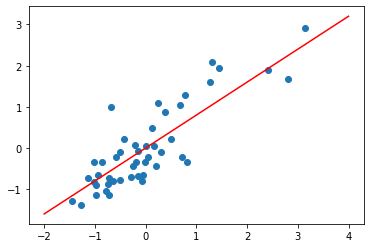

In [ ]:
limSup = np.ceil(np.amax(X_normalizado))
limInf = np.floor(np.amin(X_normalizado))
x = np.linspace(limInf, limSup, 100)
y = x*w[1] + w[0]
_ = plt.scatter(X_normalizado, Y_normalizado)
_ = plt.plot(x, y, 'red')

### **Testando o modelo obtido:**

Depois de efetuarmos a Regressão Linear, podemos prever o valor do preço de um imóvel dado a sua área. Dessa forma, considere que tenhamos um imóvel de $1500\text{ft}^2 ≈ 139\text{m}^2$. De acordo com nosso modelo, levando em conta os dados imobiliários de Oregon, quanto ele custaria?

Primeiramente, vamos normalizar esse valor de acordo com os dados que possuímos:

In [ ]:
x_teste = 1500
x_teste_normalizado = (x_teste - X.mean(axis=0))/X.std(axis=0)    

Depois, rodamos o modelo para obter um valor (normalizado) de preço:

In [ ]:
y_teste_normalizado = x_teste_normalizado*(w[1].item()) + (w[0].item())

Agora, desnormalizamos esse valor de preço para obter um valor em dólar ($):

In [ ]:
y_teste = (y_teste_normalizado*Y.std(axis=0)) + Y.mean(axis=0)

In [ ]:
print(f"Portanto, de acordo com o modelo, um imóvel de {x_teste}ft² custaria ${y_teste:.2f}")

Portanto, de acordo com o modelo, um imóvel de 1500ft² custaria $277390.24


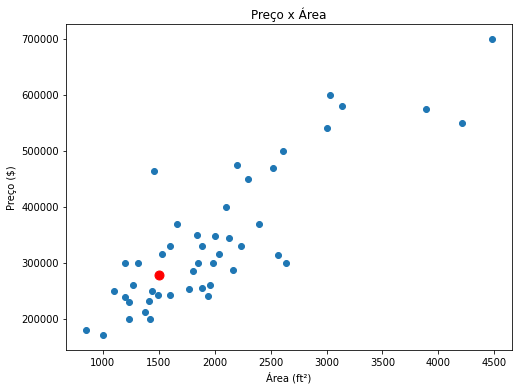

In [ ]:
figure = plt.figure(figsize=(8,6))
_ = plt.scatter(X, Y)
_ = plt.plot(x_teste, y_teste, "o", color="red", markersize=9)
_ = plt.xlabel("Área (ft²)")
_ = plt.ylabel("Preço ($)")
_ = plt.title("Preço x Área")